In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [7]:
data=json.load(open('policies.json'))

In [9]:
# Flatten the data into a DataFrame
policies_list = []
for company in data['companies']:
    if 'policies' in company:  # Check if 'policies' key exists
        for policy in company['policies']:
            policies_list.append({
                'company_name': company.get('company_name', 'Unknown'),
                'policy_id': policy.get('id', 'Unknown'),
                'question': policy.get('question', 'No Question'),
                'answer': policy.get('answer', 'No Answer'),
                'topic': policy.get('topic', 'No Topic'),
                'tags': policy.get('tags', []),
                'related_questions': policy.get('related_questions', [])
            })

if policies_list:  # Check if policies_list is not empty
    df = pd.DataFrame(policies_list)
    print(df.head())
else:
    print("No policies found in the dataset.")


  company_name policy_id                                           question  \
0   Salesforce        q1   What is Salesforce's commitment to human rights?   
1   Salesforce        q2  How does Salesforce implement human rights due...   
2   Salesforce        q3          What is Salesforce's approach to privacy?   
3   Salesforce     HR004  How does Salesforce ensure ethical and inclusi...   
4   Salesforce     HR005  What health and safety measures does Salesforc...   

                                              answer  \
0  Salesforce is committed to respecting human ri...   
1  Salesforce integrates human rights due diligen...   
2  Salesforce views privacy as a fundamental righ...   
3  Salesforce commits to ethical technology use, ...   
4  Salesforce promotes a safe work environment th...   

                              topic  \
0           Human Rights Commitment   
1        Human Rights Due Diligence   
2                  Customer Privacy   
3  Ethical and Inclusive Technol

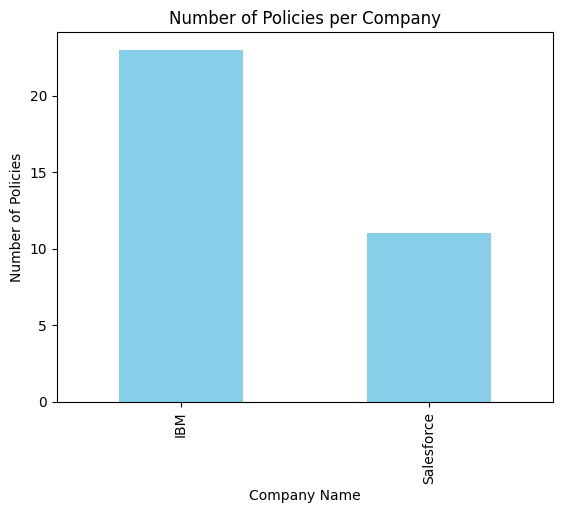

In [10]:
df['company_name'].value_counts().plot(
    kind='bar',
    title='Number of Policies per Company',
    xlabel='Company Name',
    ylabel='Number of Policies',
    color='skyblue'
)
plt.show()


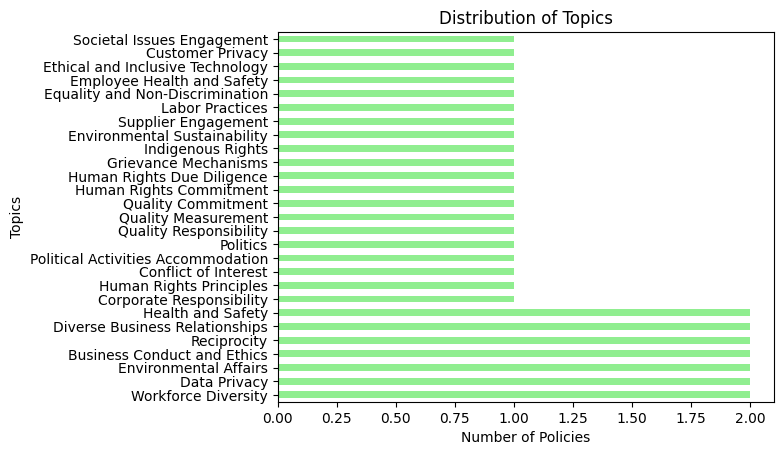

In [11]:
df['topic'].value_counts().plot(
    kind='barh',
    title='Distribution of Topics',
    xlabel='Number of Policies',
    ylabel='Topics',
    color='lightgreen'
)
plt.show()


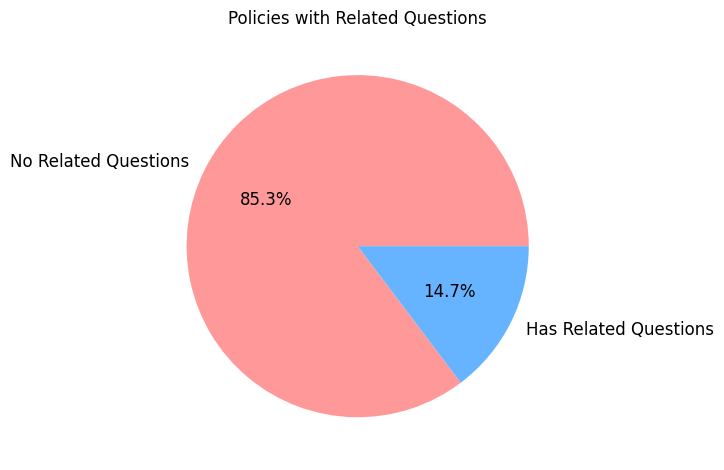

In [16]:
# Create the 'has_related_questions' column
df['has_related_questions'] = df['related_questions'].apply(lambda x: len(x) > 0)

# Plot the pie chart with new colors
df['has_related_questions'].value_counts().plot(
    kind='pie',
    labels=['No Related Questions', 'Has Related Questions'],
    autopct='%1.1f%%',
    title='Policies with Related Questions',
    colors=['#ff9999', '#66b3ff'],  # Custom colors
    textprops={'fontsize': 12}  # Adjust font size for readability
)

plt.ylabel('')  # Removes the default y-axis label for a cleaner look
plt.tight_layout()  # Adjust layout for better fit
plt.show()

Average Number of Tags per Policy: 3.35


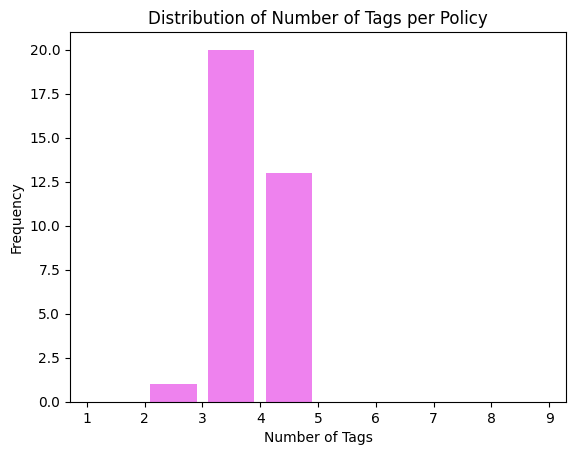

In [14]:
avg_tags = df['tags'].apply(len).mean()
print(f"Average Number of Tags per Policy: {avg_tags:.2f}")

# Optional: Histogram of tags per policy
df['tags'].apply(len).plot(
    kind='hist',
    bins=range(1, 10),
    title='Distribution of Number of Tags per Policy',
    color='violet',
    rwidth=0.8
)
plt.xlabel('Number of Tags')
plt.ylabel('Frequency')
plt.show()


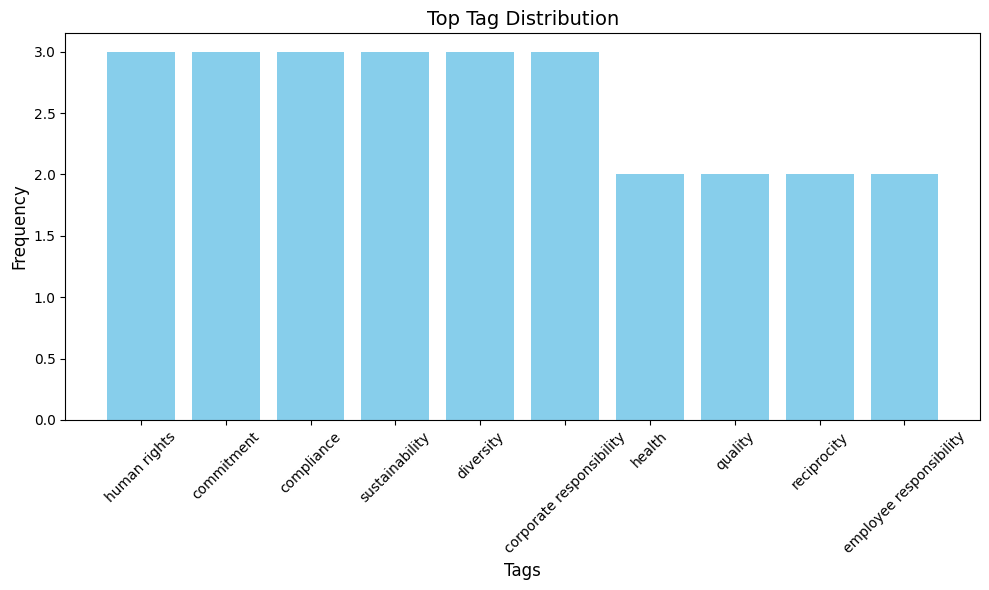

In [15]:
# Flatten tags and count their occurrences
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = Counter(all_tags)

# Convert to a DataFrame and sort
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False)

# Plot the top N tags
top_n = 10
plt.figure(figsize=(10, 6))
plt.bar(tag_df['Tag'][:top_n], tag_df['Count'][:top_n], color='skyblue')

# Add title and labels
plt.title('Top Tag Distribution', fontsize=14)
plt.xlabel('Tags', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [17]:
# Summary statistics for numeric fields (if any exist)
print("Descriptive Statistics:")
print(df.describe())

# Count of unique companies
print("\nNumber of Unique Companies:", df['company_name'].nunique())

# Count of unique topics
print("\nNumber of Unique Topics:", df['topic'].nunique())


Descriptive Statistics:
       company_name policy_id  \
count            34        34   
unique            2        34   
top             IBM        q1   
freq             23         1   

                                                question  \
count                                                 34   
unique                                                34   
top     What is Salesforce's commitment to human rights?   
freq                                                   1   

                                                   answer  \
count                                                  34   
unique                                                 34   
top     Salesforce is committed to respecting human ri...   
freq                                                    1   

                      topic                                            tags  \
count                    34                                              34   
unique                   27                  

In [18]:
df['num_tags'] = df['tags'].apply(len)


In [19]:
df['policy_length'] = df['question'].str.len() + df['answer'].str.len()


In [20]:
df['num_related_questions'] = df['related_questions'].apply(len)


In [21]:
avg_tags = df['num_tags'].mean()
print(f"Average Number of Tags per Policy: {avg_tags:.2f}")


Average Number of Tags per Policy: 3.35


In [22]:
avg_policy_length = df['policy_length'].mean()
print(f"Average Policy Length (characters): {avg_policy_length:.2f}")


Average Policy Length (characters): 246.00


In [23]:
related_percentage = (df['has_related_questions'].mean() * 100)
print(f"Percentage of Policies with Related Questions: {related_percentage:.2f}%")


Percentage of Policies with Related Questions: 14.71%


In [24]:
topic_distribution = df['topic'].value_counts()
print("\nTopic Distribution:")
print(topic_distribution)



Topic Distribution:
topic
Workforce Diversity                   2
Data Privacy                          2
Environmental Affairs                 2
Business Conduct and Ethics           2
Reciprocity                           2
Diverse Business Relationships        2
Health and Safety                     2
Corporate Responsibility              1
Human Rights Principles               1
Conflict of Interest                  1
Political Activities Accommodation    1
Politics                              1
Quality Responsibility                1
Quality Measurement                   1
Quality Commitment                    1
Human Rights Commitment               1
Human Rights Due Diligence            1
Grievance Mechanisms                  1
Indigenous Rights                     1
Environmental Sustainability          1
Supplier Engagement                   1
Labor Practices                       1
Equality and Non-Discrimination       1
Employee Health and Safety            1
Ethical and I

In [26]:
# Save the enriched DataFrame to a CSV file
output_file = "policies_with_features.csv"
df.to_csv(output_file, index=False)

print(f"DataFrame with extracted features has been saved to '{output_file}'.")


DataFrame with extracted features has been saved to 'policies_with_features.csv'.
